In [1]:
import numpy as np
import fitsio
import matplotlib.pyplot as plt
import os
import pandas as pd
import utils
import glob
import tqdm.notebook as tqdm

In [2]:
files = glob.glob('./data/*/*')
TClasses = ['AGN','BZ','CV','SN','OTHER','NON']

In [3]:
classes = []
nimages_seq = []
signal_median = []
signal_noise_median = []
pbar = tqdm.tqdm(total=len(files))
for file in files:
    for tclass in TClasses:
        if tclass in file:
            classes.append(tclass)
            data, h = fitsio.read(file, header=True)
            nimages_seq.append(h['N_IMAGES'])
            hdu_max = max(np.array(fitsio.read(file, ext=1)['HDU_Ext'], dtype=int))
            hdu_min = min(np.array(fitsio.read(file, ext=1)['HDU_Ext'], dtype=int))
            signal_noise = []
            signal = []
            for ext in range(hdu_min,hdu_max+1):
                image = fitsio.read(file, ext=ext)
                signal_noise.append(np.average(image)/np.std(image))
                signal.append(np.average(image))
            signal_noise_median.append(np.median(signal_noise))
            signal_median.append(np.median(signal))
    pbar.update()
pbar.close()

In [5]:
classes = np.array(classes)
nimages_seq = np.array(nimages_seq)
signal_noise_median = np.array(signal_noise_median)
signal_median = np.array(signal_median)
len(classes), len(nimages_seq), len(signal_noise_median), len(signal_median)

(17962, 17962, 17962, 17962)

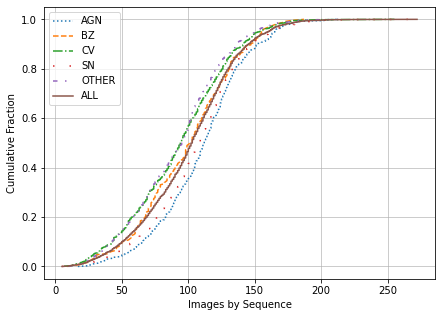

In [23]:
fig = plt.figure(figsize=(7,5))
for tclass, z in zip(['AGN','BZ','CV','SN','OTHER'],[':','--','-.',(0, (1, 10)),(0, (3, 5, 1, 5, 1, 5))]):
    ii = (tclass == classes)
    nimages = np.sort(nimages_seq[ii])
    n_points = len(nimages)
    plt.plot(nimages, np.linspace(0,1,n_points), label=tclass, linestyle=z)
    
ii = (classes != 'NON')
nimages = np.sort(nimages_seq[ii])
n_points = len(nimages)
plt.plot(nimages, np.linspace(0,1,n_points), label='ALL', linestyle='-')
plt.grid(alpha=0.8)
plt.xlabel('Images by Sequence')
plt.ylabel('Cumulative Fraction')
plt.legend()
plt.savefig('./figs/cumulative_NSequence_classes.pdf', bbox_inches='tight')
plt.show()

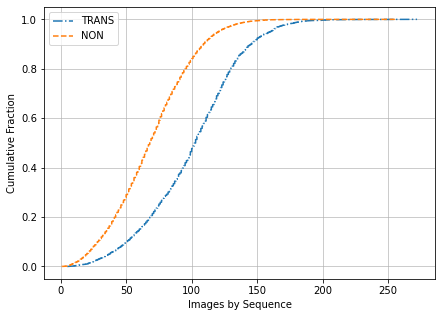

In [18]:
fig = plt.figure(figsize=(7,5))

ii = (classes != 'NON')
nimages = np.sort(nimages_seq[ii])
n_points = len(nimages)
plt.plot(nimages, np.linspace(0,1,n_points), label='TRANS', linestyle='-.')

ii = (classes == 'NON')
nimages = np.sort(nimages_seq[ii])
n_points = len(nimages)
plt.plot(nimages, np.linspace(0,1,n_points), label='NON', linestyle='--')

plt.legend()
plt.grid(alpha=0.8)
plt.xlabel('Images by Sequence')
plt.ylabel('Cumulative Fraction')
plt.savefig('./figs/cumulative_NSequence_TvsNT.pdf', bbox_inches='tight')
plt.show()

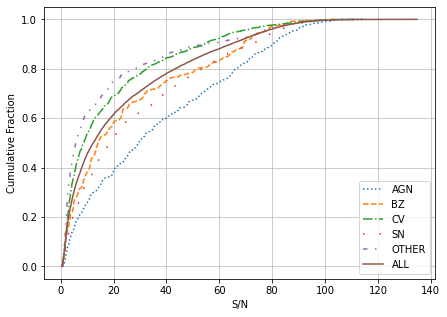

In [19]:
fig = plt.figure(figsize=(7,5))
for tclass, z in zip(['AGN','BZ','CV','SN','OTHER'],[':','--','-.',(0, (1, 10)),(0, (3, 5, 1, 5, 1, 5))]):
    ii = (tclass == classes)
    snm = np.sort(signal_noise_median[ii])
    n_points = len(snm)
    plt.plot(snm, np.linspace(0,1,n_points), label=tclass, linestyle=z)
    
snm_all = np.sort(signal_noise_median)
n_points = len(snm_all)
plt.plot(snm_all, np.linspace(0,1,n_points), label='ALL', linestyle='-')
plt.grid(alpha=0.8)
plt.xlabel('S/N')
plt.ylabel('Cumulative Fraction')
plt.legend()
plt.savefig('./figs/cumulative_signalnoisse_classes.pdf', bbox_inches='tight')
plt.show()

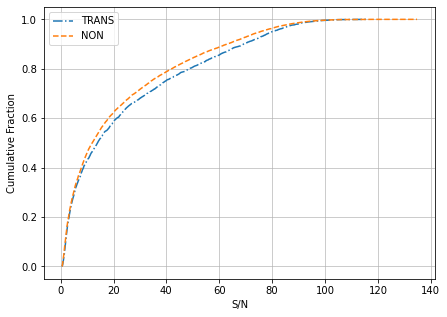

In [20]:
fig = plt.figure(figsize=(7,5))

ii = (classes != 'NON')
snm = np.sort(signal_noise_median[ii])
n_points = len(snm)
plt.plot(snm, np.linspace(0,1,n_points), label='TRANS', linestyle='-.')

ii = (classes == 'NON')
snm = np.sort(signal_noise_median[ii])
n_points = len(snm)
plt.plot(snm, np.linspace(0,1,n_points), label='NON', linestyle='--')

plt.legend()
plt.grid(alpha=0.8)
plt.xlabel('S/N')
plt.ylabel('Cumulative Fraction')
plt.savefig('./figs/cumulative_signalnoisse_TvsNT.pdf', bbox_inches='tight')
plt.show()

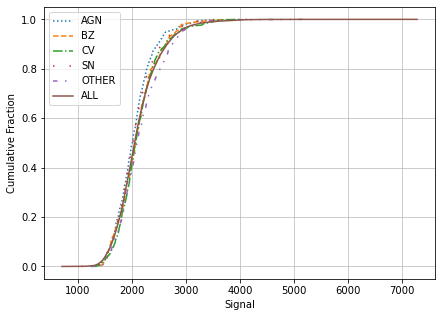

In [21]:
fig = plt.figure(figsize=(7,5))
for tclass, z in zip(['AGN','BZ','CV','SN','OTHER'],[':','--','-.',(0, (1, 10)),(0, (3, 5, 1, 5, 1, 5))]):
    ii = (tclass == classes)
    snm = np.sort(signal_median[ii])
    n_points = len(snm)
    plt.plot(snm, np.linspace(0,1,n_points), label=tclass, linestyle=z)
    
snm_all = np.sort(signal_median)
n_points = len(snm_all)
plt.plot(snm_all, np.linspace(0,1,n_points), label='ALL', linestyle='-')
plt.grid(alpha=0.8)
plt.xlabel('Signal')
plt.ylabel('Cumulative Fraction')
plt.legend()
plt.savefig('./figs/cumulative_signal_classes.pdf', bbox_inches='tight')
plt.show()

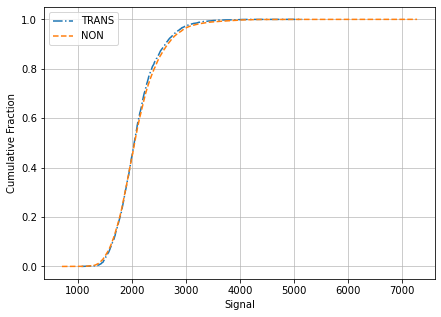

In [22]:
fig = plt.figure(figsize=(7,5))

ii = (classes != 'NON')
snm = np.sort(signal_median[ii])
n_points = len(snm)
plt.plot(snm, np.linspace(0,1,n_points), label='TRANS', linestyle='-.')

ii = (classes == 'NON')
snm = np.sort(signal_median[ii])
n_points = len(snm)
plt.plot(snm, np.linspace(0,1,n_points), label='NON', linestyle='--')

plt.legend()
plt.grid(alpha=0.8)
plt.xlabel('Signal')
plt.ylabel('Cumulative Fraction')
plt.savefig('./figs/cumulative_signal_TvsNT.pdf', bbox_inches='tight')
plt.show()